In [5]:
# import wget to download data
import wget

In [6]:
# download dataset from google api

url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
filename = wget.download(url)

100% [........................................................................] 68606236 / 68606236

In [4]:
# !wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
# unzip the file to the current directory

import zipfile

local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()

zip_ref.close()

In [30]:
# check the train and test directory

import os

base_dir = 'cats_and_dogs_filtered' 
base_dir

'cats_and_dogs_filtered'

In [31]:
os.listdir(base_dir)

['train', 'validation', 'vectorize.py']

In [32]:
# train and test 

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [33]:
# length of training data
print('total number of cats imgaes : {}'.format(len(os.listdir(train_cats_dir))))
print('total number of dogs imgaes : {}'.format(len(os.listdir(train_dogs_dir))))

total number of cats imgaes : 1000
total number of dogs imgaes : 1000


In [34]:
# length of vaildation data
print('total number of cats imgaes for validation: {}'.format(len(os.listdir(validation_cats_dir))))
print('total number of dogs imgaes for validation: {}'.format(len(os.listdir(validation_dogs_dir))))

total number of cats imgaes for validation: 500
total number of dogs imgaes for validation: 500


In [39]:
# check how the filenames looks like

train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [49]:
## check the shape 

# from tensorflow.keras.utils import img_to_array, load_img

# img = load_img(train_cat_fnames[0])
# img = img_to_array(img)
# img.shape

In [42]:
# import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [37]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

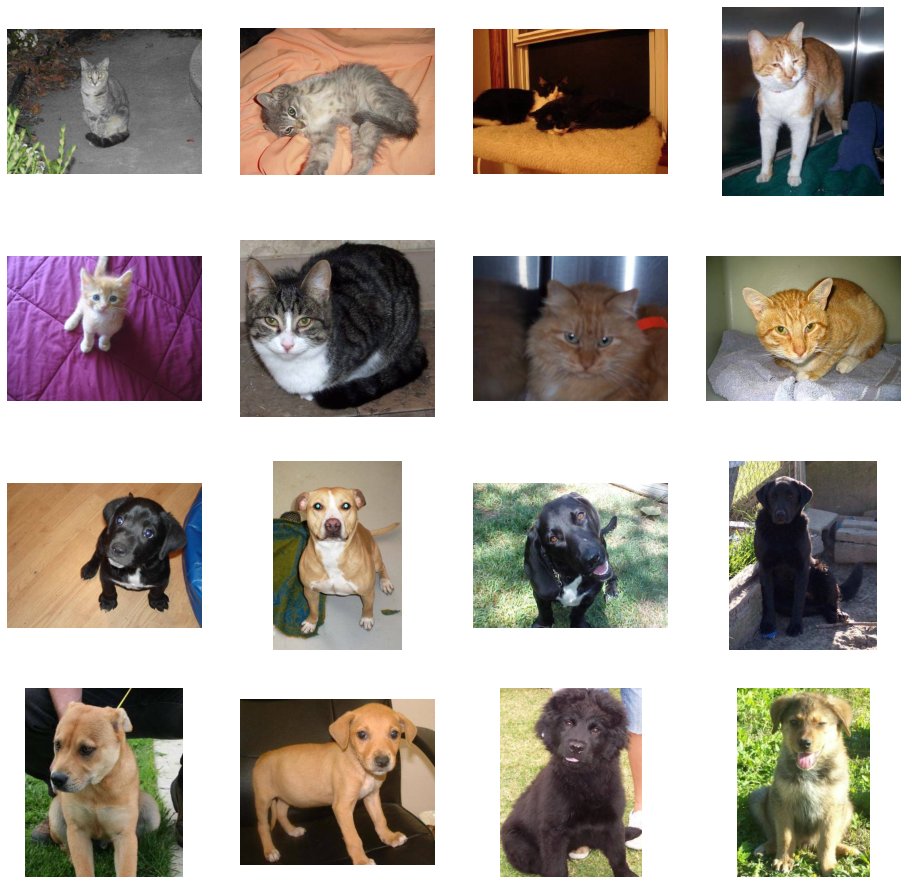

In [43]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

### Create Model

In [45]:
# import libraries

import tensorflow as tf
import tensorflow.keras as keras

In [51]:
# create and instantiate model

model = keras.models.Sequential([
    
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (150, 150, 3)),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [53]:
from keras.optimizers import RMSprop

In [54]:
# model compilation

model.compile(optimizer= RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

In [55]:
## Pre_processing using ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [56]:
# instantiate ImageDataGenerator
# recale the image data during import

generator = ImageDataGenerator(rescale=1/255.0)

In [57]:
# train data generator

train_generator = generator.flow_from_directory(train_dir,
                                               target_size=(150, 150),
                                                class_mode='binary',
                                                batch_size=20)

Found 2000 images belonging to 2 classes.


In [58]:
# validation data generator

validation_generator = generator.flow_from_directory(test_dir,
                                               target_size=(150, 150),
                                                class_mode='binary',
                                                batch_size=20)

Found 1000 images belonging to 2 classes.


In [59]:
# fit the model

model.fit(train_generator,
          epochs=15,
          validation_data=validation_generator,
          verbose=2
         )

Epoch 1/15
100/100 - 25s - loss: 0.8146 - accuracy: 0.5265 - val_loss: 0.6787 - val_accuracy: 0.6530 - 25s/epoch - 247ms/step
Epoch 2/15
100/100 - 25s - loss: 0.6691 - accuracy: 0.6305 - val_loss: 0.6207 - val_accuracy: 0.6660 - 25s/epoch - 248ms/step
Epoch 3/15
100/100 - 23s - loss: 0.5803 - accuracy: 0.6955 - val_loss: 0.6102 - val_accuracy: 0.6650 - 23s/epoch - 231ms/step
Epoch 4/15
100/100 - 25s - loss: 0.5071 - accuracy: 0.7580 - val_loss: 0.5927 - val_accuracy: 0.7030 - 25s/epoch - 253ms/step
Epoch 5/15
100/100 - 24s - loss: 0.4528 - accuracy: 0.7875 - val_loss: 0.5685 - val_accuracy: 0.7400 - 24s/epoch - 240ms/step
Epoch 6/15
100/100 - 24s - loss: 0.3802 - accuracy: 0.8230 - val_loss: 0.6358 - val_accuracy: 0.7080 - 24s/epoch - 243ms/step
Epoch 7/15
100/100 - 23s - loss: 0.3046 - accuracy: 0.8670 - val_loss: 0.6871 - val_accuracy: 0.6990 - 23s/epoch - 232ms/step
Epoch 8/15
100/100 - 25s - loss: 0.2261 - accuracy: 0.9030 - val_loss: 0.7997 - val_accuracy: 0.7000 - 25s/epoch - 245

In [60]:
## check metrics

history = model.history.history

In [61]:
pd.DataFrame(history)

,loss,accuracy,val_loss,val_accuracy
0,0.814596,0.5265,0.678726,0.653
1,0.669076,0.6305,0.620710,0.666
2,0.580267,0.6955,0.610166,0.665
3,0.507057,0.7580,0.592731,0.703
4,0.452846,0.7875,0.568517,0.740
5,0.380159,0.8230,0.635812,0.708
6,0.304613,0.8670,0.687076,0.699
7,0.226124,0.9030,0.799692,0.700
8,0.165721,0.9340,0.963080,0.724
9,0.108605,0.9550,0.973771,0.724


Text(0.5, 1.0, 'Training and validation loss')

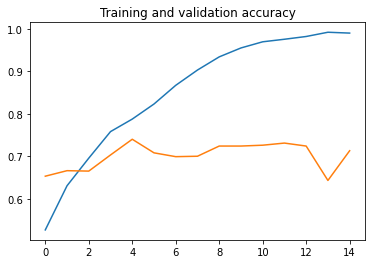

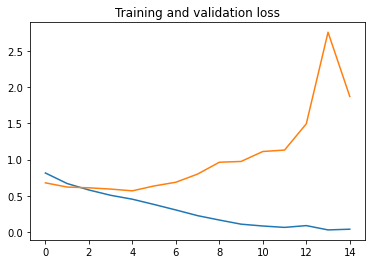

In [63]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history['accuracy']
val_acc  = history['val_accuracy']
loss     = history[    'loss' ]
val_loss = history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

- As we can see, the model is overfitting like it's getting out of fashion. The training accuracy (in blue) gets close to 100% while the validation accuracy (in orange) stalls as 70%. The validation loss reaches its minimum after only five epochs.

### Prediction on new image

In [64]:
from tensorflow.keras.utils import img_to_array, load_img

(1, 150, 150, 3)

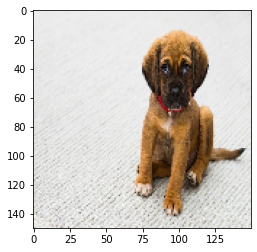

In [81]:
# load and display the image
img = load_img('cat_3.jpg', target_size=(150, 150))
plt.imshow(img)


# convert into np array and reshape
x = img_to_array(img)
x = x.reshape((1,)+x.shape)
x.shape

In [70]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [82]:
# predict using the model

classes = model.predict(x, batch_size=20)
print(classes[0])

if classes[0][0] > 0.5:
    print('It is a dog')
else:
    print('It is a cat')

1/1 [==============================] - 0s 96ms/step
[1.]
It is a dog


### Checking how the image convolved during the training phases

1/1 [==============================] - 0s 184ms/step


C:\Users\budha\AppData\Local\Temp\ipykernel_9932\1921161679.py:48: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


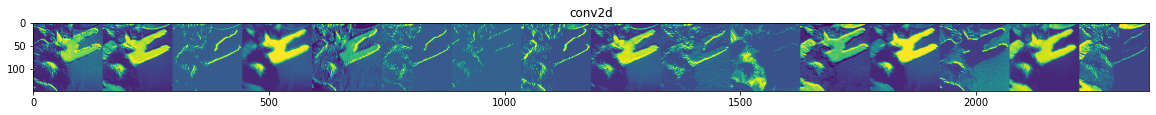

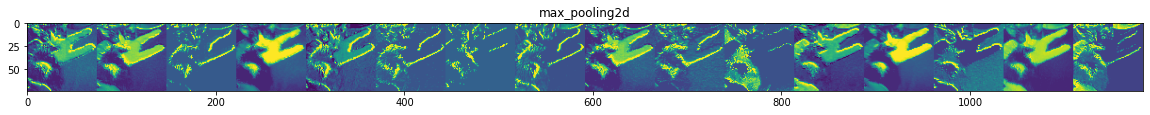

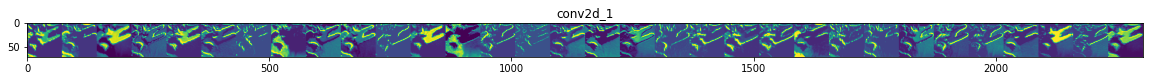

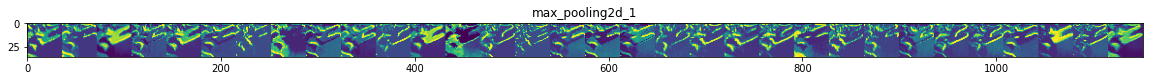

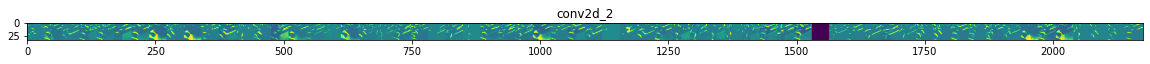

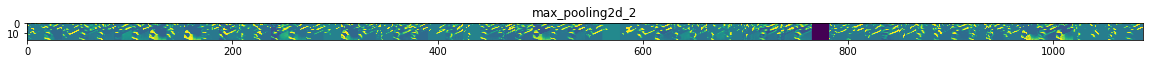

In [84]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
        x  = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std ()
        x *=  64
        x += 128
        x  = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

In [ ]:
# import os, signal

# os.kill(     os.getpid() , 
#          signal.SIGKILL
#        )